# DETECTING SPAM MESSAGES 

##### Detecting spam messages from messages by using Multinomial Naive Bayes.

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# DATA

In [26]:
df = pd.read_csv('DATA/SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot: xlabel='Category', ylabel='count'>

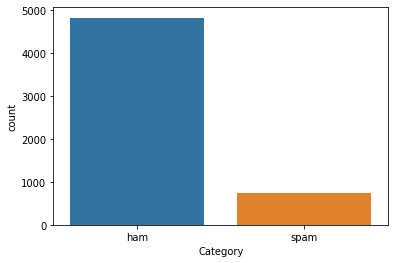

In [28]:
sns.countplot(data=df, x='Category')

### PREPARING THE DATA BEFORE TRAINING

In [29]:
X = df['Message']
y = df['Category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### FEATURE EXTRACTION

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

## MODEL TRAINING

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

### PERFORMANCE EVALUATION

In [32]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

##### TRAIN DATA

In [33]:
train_pred = nb.predict(X_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      3350
        spam       1.00      0.88      0.94       550

    accuracy                           0.98      3900
   macro avg       0.99      0.94      0.96      3900
weighted avg       0.98      0.98      0.98      3900



##### TEST DATA

In [34]:
test_pred = nb.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.73      0.84       197

    accuracy                           0.97      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.97      0.97      1672



##### Confusion Matrix

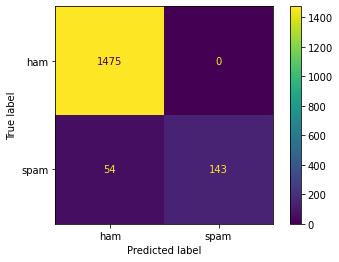

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)